**This NOTEBOOK CONTAINS THE FORECAST OF AMOUNT FROM INVOICES DATA AND FORECAST OF COMBINATION OF INVOICES AND SALES RECEIPT DATA FOR SELLER 16.**

In [861]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Below is the code to import two separate datafiles. One is containing the sales receipt data and other is the old data without sales.**

In [862]:
sales=pd.read_csv("sales_receipt.csv")
seller_buyer=pd.read_csv("seller_buyer_paymentdetails.csv")

**Sample of sales receipt data.**

In [863]:
sales.head(20)

,Unnamed: 0,SellerId,BuyerId,TransactionDate,ShipDate,Amount,Balance
0,0,20,30767,2019-07-12T00:00:00.000Z,NaN,246903,0
1,1,20,30767,2019-07-11T00:00:00.000Z,NaN,265894,0
2,2,20,30767,2019-07-10T00:00:00.000Z,NaN,291531,0
3,3,20,30767,2019-07-09T00:00:00.000Z,NaN,259673,0
4,4,20,30767,2019-07-08T00:00:00.000Z,NaN,240735,0
5,5,20,30767,2019-07-03T00:00:00.000Z,NaN,150852,0
6,6,20,30767,2019-07-02T00:00:00.000Z,NaN,234683,0
7,7,20,30767,2019-07-01T00:00:00.000Z,NaN,201315,0
8,8,20,30767,2019-06-28T00:00:00.000Z,NaN,174549,0
9,9,20,30767,2019-06-27T00:00:00.000Z,NaN,210383,0


**Sample of data without sales.**

In [864]:
seller_buyer.head(20)

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Amount
0,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,74970.0
1,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,109841.0
2,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,51128.0
3,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,74630.0
4,2017-06-30T00:00:00.000Z,2017-07-19 00:00:00+00:00,87531,13,16140,299030.0
5,2017-06-30T00:00:00.000Z,2017-07-24 00:00:00+00:00,87531,13,16140,492469.0
6,2017-06-16T00:00:00.000Z,2017-07-25 00:00:00+00:00,87531,13,16147,276100.0
7,2017-07-28T00:00:00.000Z,2017-07-31 00:00:00+00:00,87531,13,16136,95175.0
8,2017-07-28T00:00:00.000Z,2017-08-02 00:00:00+00:00,87531,13,16146,128400.0
9,2016-04-30T00:00:00.000Z,2017-08-02 00:00:00+00:00,87531,10,15066,NaN


**Cleaning the data by droping na values from it.**

In [865]:
seller_buyer=seller_buyer.dropna()

**Changing the format of time series into the inherent format of python.**

In [866]:
sales["TransactionDate"]=pd.to_datetime(pd.to_datetime(sales.TransactionDate).dt.date)
seller_buyer["TransactionDate"]=pd.to_datetime(pd.to_datetime(seller_buyer.TransactionDate).dt.date)

**Below is the extraction of requisite variables from both the datasets.**

In [867]:
sales_fin=sales[["TransactionDate","SellerId", "Amount"]]
seller_buyer_fin=seller_buyer[["TransactionDate","SellerId", "Amount"]]

**Appending the two dataframes to get the combined dataset.**

In [868]:
merged_data=seller_buyer_fin.append(sales_fin, ignore_index=True, sort=True)

**Now by addition of the sales data there is a significant change in the count for some sellers.**

In [869]:
count_of_sales=sales.groupby("SellerId").TransactionDate.count()
count_without_sales=seller_buyer.groupby("SellerId").TransactionDate.count()
count_after_merging=merged_data.groupby("SellerId").TransactionDate.count()
count=pd.DataFrame()
count["count_of_sales"]=count_of_sales
count["older_count"]=count_without_sales
count["count_after_merging"]=count_after_merging
count=count.fillna(0)
count["older_count"]=count.older_count.apply(lambda x: int(x))

**In the dataframe below we can see the change in count by addition of the sales receipt data.**

In [870]:
count

,count_of_sales,older_count,count_after_merging
SellerId,,,
3,75,88,163
5,1168,1370,2538
7,206,0,206
10,4,17586,17590
11,410,3367,3777
12,2,6706,6708
14,95,2331,2426
16,12595,787,13382
18,356,1520,1876


<font color="red"> **FORECAST FOR SELLER 16 WITHOUT ADDITION OF SALES RECEIPT DATA.**</font>

**Below set of codes is to prepare the time series by extracting the variables Transaction data and Amount of sales. After that Transaction date has been set as index. Then data is grouped monthly and aggregated. In the final code the variable is extracted to make it a time series.**

In [871]:
data=seller_buyer_fin[seller_buyer_fin["SellerId"]==16][["TransactionDate","Amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Amount"]
ts=ts.apply(lambda x: int(x))

**Below is the sample of the time series.**

In [872]:
ts.head(10)

TransactionDate
2016-05-31      151112
2016-06-30    12019163
2016-07-31    11896361
2016-08-31     6193621
2016-09-30     7048514
2016-10-31     7785982
2016-11-30     5375389
2016-12-31     5267830
2017-01-31     8828454
2017-02-28    11019505
Freq: M, Name: Amount, dtype: int64

**Now let us see the last few rows of the time series.**

In [873]:
ts.tail()

TransactionDate
2019-03-31    14326028
2019-04-30     3553312
2019-05-31     5171677
2019-06-30     5200040
2019-07-31      156568
Freq: M, Name: Amount, dtype: int64

**It can be seen that in july 2019 the amount is very low. This is because the data of july 2019 is incomplete. So it seems good to remove the july data.**

In [874]:
ts1=ts[:-1]

**Now the last row is removed.**

In [875]:
ts1.tail()

TransactionDate
2019-02-28    21288012
2019-03-31    14326028
2019-04-30     3553312
2019-05-31     5171677
2019-06-30     5200040
Freq: M, Name: Amount, dtype: int64

**To check stationarity of the data we will apply dickey fuller test.**

**Below is a well formated function to operate the test.**

In [876]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return (dfoutput)

In [877]:
dft(ts1)

Results of Dickey-Fuller Test:


Test_stats                    -5.736296e+00
p-value                        6.426795e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64

**Now the test_stats is lesser than the critical values so the series is stationary.**

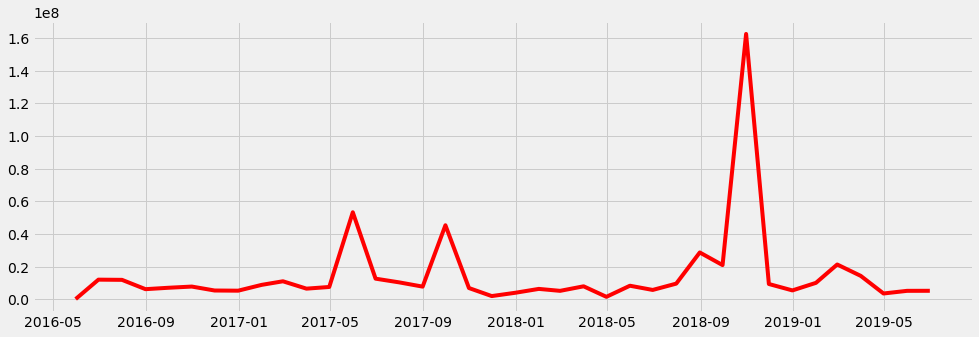

In [878]:
plt.figure(figsize=(15,5))
plt.plot(ts1, color="red")
plt.grid(True)

**From above plot the series does not seem to a seasonal one so we will proceed with ARIMA model which is preferred for data without seasonality.**

**Below is the importing the libraries and creating acf and pacf functions to find the order of the arima model.**

In [879]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 
lag_acf = acf(ts1, nlags=6)
lag_pacf = pacf(ts1, nlags=8, method='ols')
#ols stands for ordinary least squared.

**Below plot will give the q parameter.**

Text(0.5, 1.0, 'Autocorrelation Function')

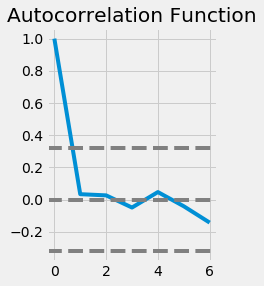

In [880]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

so q=1

**Below plot will give p parameter.**

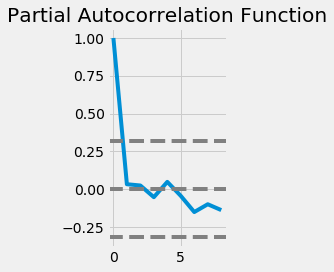

In [881]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

hence p=1

**Now applying the ARIMA model.**

In [882]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts1, order=(1, 0,1))
#Though no differencing is applied in the series so d=0
model_fit = model.fit(disp=False)

**Below is the prediction portion from july to december.**

In [883]:
ts1.tail()

TransactionDate
2019-02-28    21288012
2019-03-31    14326028
2019-04-30     3553312
2019-05-31     5171677
2019-06-30     5200040
Freq: M, Name: Amount, dtype: int64

In [884]:
prediction= model_fit.predict(start="2019-07-31",end="2019-12-31")

**This function is used to add the last value of time sereis at the first place of predicted series. This is used to make the series continuous.**

In [885]:
def pred_fin(predicted, train):
    c=pd.Index(predicted.index)
    c=c.insert(0, pd.to_datetime(train.index[-1]))
    lis=list(predicted.values)
    lis.insert(0,train[-1])
    lis=pd.Series(lis,index=c)
    prediction_final=lis.apply(lambda x:int(x))
    return prediction_final

**Now forecast 1 is our final forecast for ts1 time series.**

In [886]:
forecast1=pred_fin(prediction, ts1)

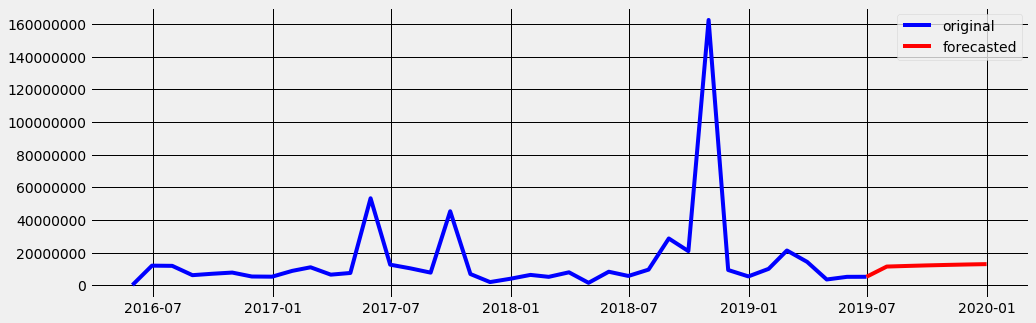

In [887]:
plt.figure(figsize=(15,5))
plt.plot(ts1, color="blue", label="original")
plt.plot(forecast1, color="red", label="forecasted")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="black")
plt.legend(loc="best")
plt.show()

<font color="red"> **FORECAST FOR SELLER 16 AFTER ADDITION OF SALES RECEIPT DATA.**</font>

In [888]:
data=merged_data[merged_data["SellerId"]==16][["TransactionDate","Amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Amount"]
ts2=ts[:-1]

In [889]:
dft(ts2)

Results of Dickey-Fuller Test:


Test_stats                     -4.974900
p-value                         0.000025
#Lags Used                      0.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

**Series is stationary**

**Preparing for model preparation.**

In [890]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 
lag_acf = acf(ts2, nlags=6)
lag_pacf = pacf(ts2, nlags=6, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

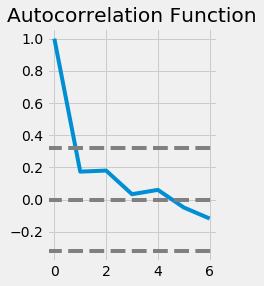

In [891]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

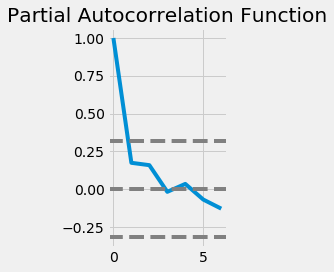

In [892]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [893]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts2, order=(1, 0,2))
#Though no differencing is applied in the series so d=0
model_fit = model.fit(disp=False)

In [894]:
ts2.tail()

TransactionDate
2019-02-28    21288012.0
2019-03-31    14326028.0
2019-04-30     3553312.0
2019-05-31     5171677.0
2019-06-30     5200040.0
Freq: M, Name: Amount, dtype: float64

In [895]:
prediction= model_fit.predict(start="2019-07-31",end="2019-12-31")

In [896]:
forecast2=pred_fin(prediction, ts2)

**Below is the final forecasted plot for this time series. Obviously after addition of data the value of amount has increased.**

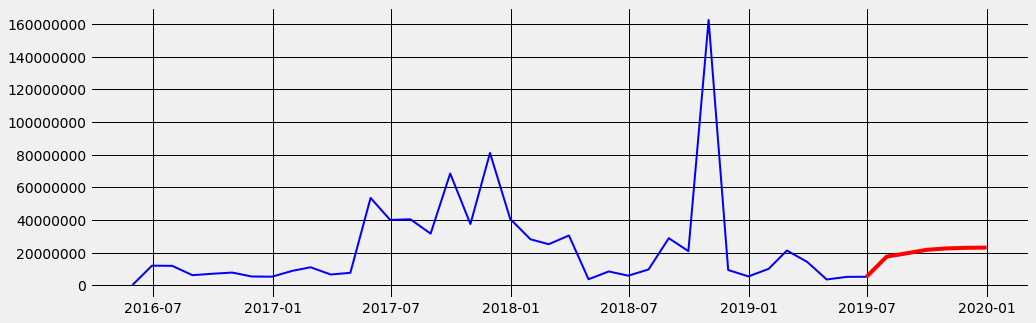

In [897]:
plt.figure(figsize=(15,5))
plt.plot(ts2, color="blue", linewidth=2)
plt.plot(forecast2, color="red", linewidth=4)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="black")
plt.show()

**In the below curve 4 components are there-**  
1. Time series without sales in blue color.
2. Forecast without sales in green color.
3. Time series with sales in brown color.
4. Forecast with sales in red color.

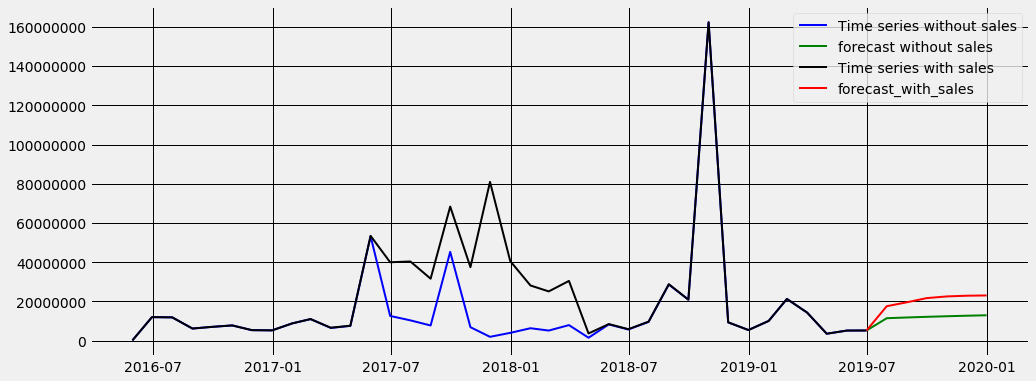

In [900]:
plt.figure(figsize=(15,6))
plt.plot(ts1, color="blue", linewidth=2, label="Time series without sales")
plt.plot(forecast1, color="green", linewidth=2, label="forecast without sales")
plt.plot(ts2, color="black", linewidth=2, label="Time series with sales")
plt.plot(forecast2, color="red", linewidth=2, label="forecast_with_sales")
plt.legend(loc="best")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="black")
plt.show()

**Obviously we can observe that red curve is going considerably above the green curve. This tells that addition of data is good for the quality of forecst.**

In [901]:
df=pd.DataFrame()
df["f1"]=forecast1
df["f2"]=forecast2

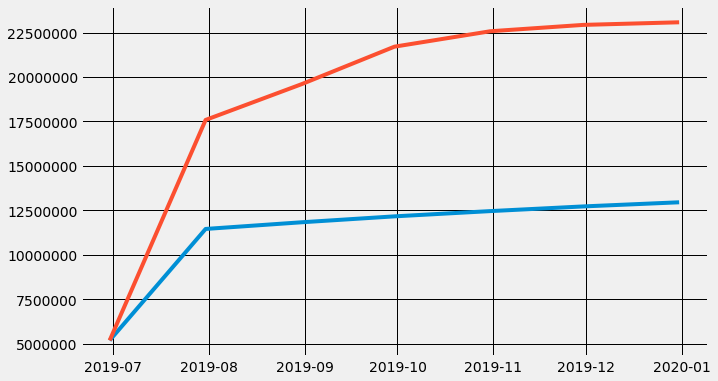

In [907]:
plt.figure(figsize=(10,6))
plt.plot(df.f1)
plt.plot(df.f2)
plt.grid(True, color="black")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()